# SimuPark: Un parque simulado

Desarrollado por: 
> Daniel David Delgado Cervantes - 2182066

392.47197860023283


Text(0, 0.5, 'Frecuencia')

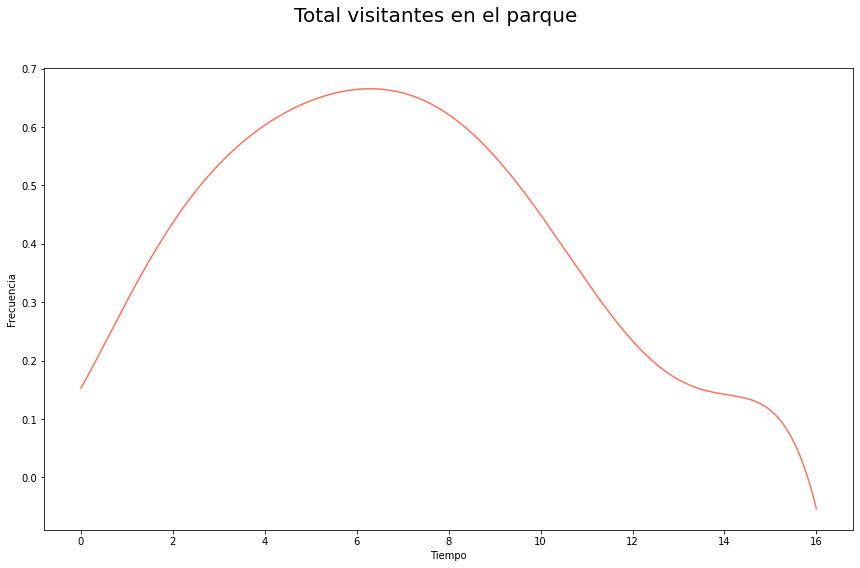

In [12]:
from matplotlib.pyplot import plot, hist, gcf, figure, xlabel, ylabel
import numpy as np
from scipy.special import gamma, factorial
import pandas as pd
import scipy.stats as st

fig = gcf()
fig.set_size_inches(14.5, 8.5)

x = np.linspace(0, 16, 16*60)
k = 5
fn = lambda x, k:  (((0.631012633902875 * ((x+1) ** 0 ) + 0.141641794969108 * ((x+1) ** 1 ) + 1.08320562754808 * ((x+1) ** 2 ) + -0.386896805430061 * ((x+1) ** 3 ) + 0.0645561077512354 * ((x+1) ** 4 ) + -0.00580069833046977 * ((x+1) ** 5 ) + 0.000263776181717327 * ((x+1) ** 6 ) + -4.72376212119374e-06 * ((x+1) ** 7 ))) / 10)

print(sum(fn(x, k)))

plot(x, fn(x,k), color='#ff725e')
fig.suptitle('Total visitantes en el parque', fontsize = 20)
xlabel('Tiempo')
ylabel('Frecuencia')

In [13]:
from simuPark.park import Activity, Attraction, Park
from simuPark.person import Person, Archetype
import random

park = Park(
    fn=fn
)

park.start_day(max_entry_rate=95000/960, wait_time_update=5)

Generating Entry Events...
Entry Events Generated



100%|██████████| 960/960 [00:20<00:00, 47.46it/s] 


38985
['Walk15', 'Walk10', 'ShopGifts', 'EatRestaurant', 'BathroomBreak', 'TakePictures']
['DINOSAUR', 'Expedition Everest', 'Flight of Passage', 'Kali River Rapids', 'Kilimanjaro Safaris', "Na'vi River Journey", 'TriceraTop Spin']
['Tourist', 'Average', 'Activity Enjoyer', 'Attraction Enjoyer', 'All Day Park', 'Relaxed Visitor']


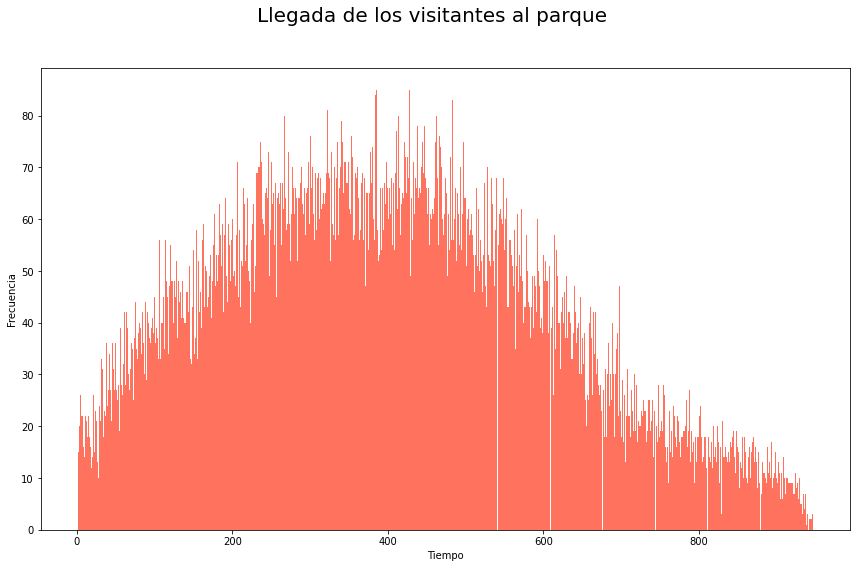

In [14]:
print(len(park.guests))

y = [guest.arrival_time for guest in park.guests]

fig = figure()
fig.set_size_inches(14.5, 8.5)
hist(y, color="#ff725e", bins=960);
fig.suptitle('Llegada de los visitantes al parque', fontsize = 20)
xlabel('Tiempo')
ylabel('Frecuencia')


print([i.name for i in park.activities])
print([i.name for i in park.attractions])
print([i.name for i in park.guest_archetypes])

In [15]:
guest_data = []
column_name = [
    'Archetype',
    'arrival_time',
    'departure_time',
    'time_in_park',
    'max_wait',
    'attractions_experienced',
    'total_wait_time',
    'average_wait_time',
    ]

for guest in park.guests:
    current_guest = []

    current_guest.append(guest.archetype)
    current_guest.append(guest.arrival_time)
    current_guest.append(guest.departure_time)
    current_guest.append(guest.departure_time - guest.arrival_time)
    current_guest.append(guest.max_wait)
    current_guest.append(guest.attractions_experienced)
    current_guest.append(guest.total_wait_time)
    if guest.attractions_experienced == 0:
        current_guest.append(0)
    else: 
        current_guest.append(guest.total_wait_time / guest.attractions_experienced)

    guest_data.append(current_guest)

guest_df = pd.DataFrame(guest_data, columns=column_name)
guest_df

,Archetype,arrival_time,departure_time,time_in_park,max_wait,attractions_experienced,total_wait_time,average_wait_time
0,All Day Park,1,619,618,40,6,68,11.333333
1,Average,1,270,269,50,11,78,7.090909
2,Activity Enjoyer,1,137,136,10,3,21,7.000000
3,Attraction Enjoyer,1,522,521,70,13,152,11.692308
4,All Day Park,1,602,601,40,6,49,8.166667
...,...,...,...,...,...,...,...,...
38980,Average,945,960,15,50,0,0,0.000000
38981,All Day Park,946,960,14,40,0,0,0.000000
38982,Average,947,960,13,50,1,9,9.000000
38983,Activity Enjoyer,947,960,13,10,0,0,0.000000


Atracciones experimentadas promedio: 3.5673977170706683
Atracciones experimentadas desviación estandar: 2.9530686851888994


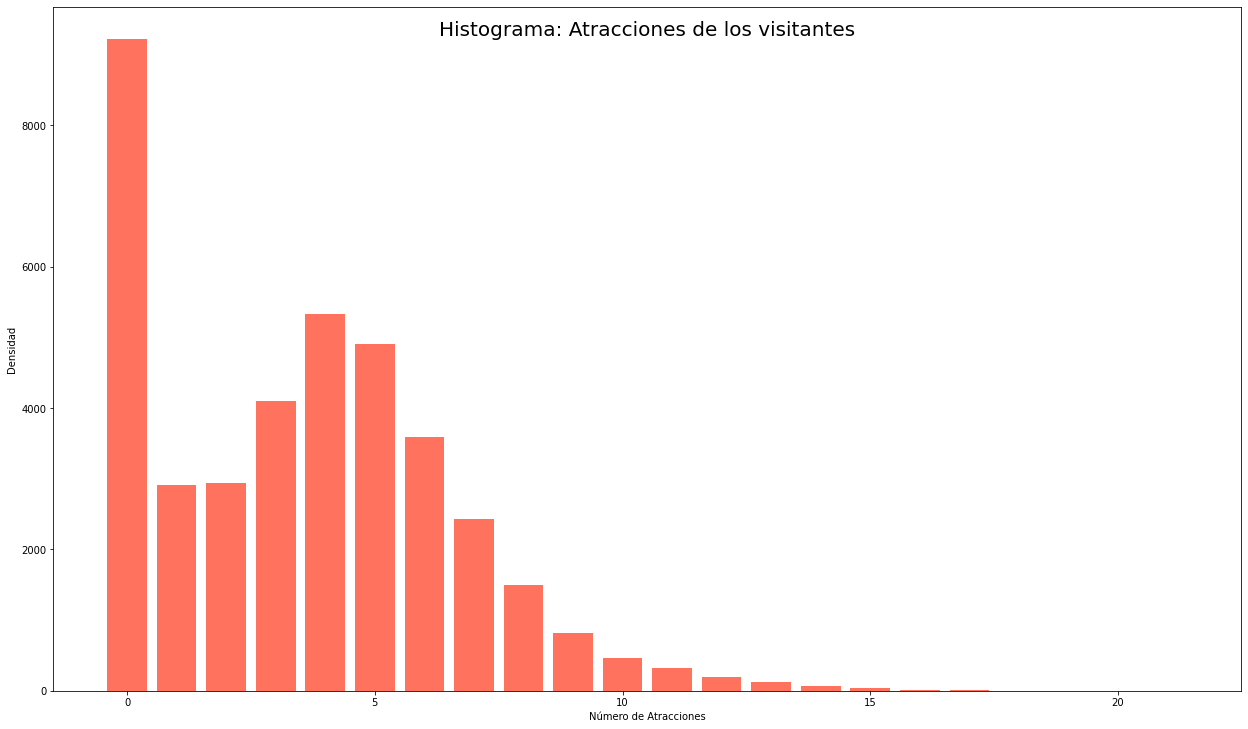

In [16]:
heights = [0 for _ in range(np.max(guest_df['attractions_experienced'])+1)]
labels = [i for i in range(np.max(guest_df['attractions_experienced'])+1)]
attrExp = [guest.attractions_experienced for guest in park.guests]

for guest in park.guests:
    heights[guest.attractions_experienced] += 1

fig = figure()
fig.set_size_inches(16.5, 9.5)
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, heights, color="#ff725e");
fig.suptitle('Histograma: Atracciones de los visitantes', fontsize = 20)
xlabel('Número de Atracciones')
ylabel('Densidad')

print(f'Atracciones experimentadas promedio: {np.mean(attrExp)}')
print(f'Atracciones experimentadas desviación estandar: {np.std(attrExp)}')

36.97220374427975
(36.789582272055455, 37.15482521650405)
29767
118.0


Text(0, 0.5, 'Densidad')

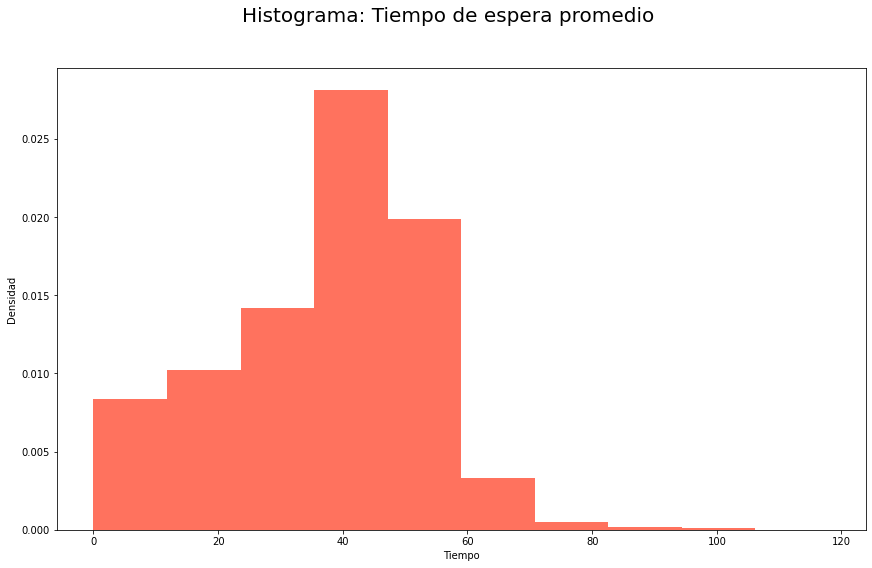

In [17]:
import scipy.stats as st

avgWaitTime = []

for guest in park.guests:
    if guest.attractions_experienced != 0:
        avgWaitTime.append(guest.total_wait_time / guest.attractions_experienced)

print(np.mean(avgWaitTime))
print(st.t.interval(alpha=0.95, df=len(avgWaitTime)-1, loc=np.mean(avgWaitTime), scale=st.sem(avgWaitTime)))
print(len(avgWaitTime))
print(max(avgWaitTime))

fig = figure()
fig.set_size_inches(14.5, 8.5)
hist(avgWaitTime, density=True, color="#ff725e");
fig.suptitle('Histograma: Tiempo de espera promedio', fontsize = 20)
xlabel('Tiempo')
ylabel('Densidad')


In [18]:
attr_wait_time = [[attr.name, attr.queue.top_wait_time] for attr in park.attractions]
attr_df = pd.DataFrame(attr_wait_time, columns=["Name", "MaximunWaitTime"])
attr_df

,Name,MaximunWaitTime
0,DINOSAUR,30
1,Expedition Everest,15
2,Flight of Passage,45
3,Kali River Rapids,15
4,Kilimanjaro Safaris,30
5,Na'vi River Journey,40
6,TriceraTop Spin,0


In [19]:
[guest for guest in park.guests if guest.attractions_experienced != 0 and guest.attractions_experienced == max(labels)][0].report()


id: 465  arvTime: 26 things_done: ["Na'vi River Journey", 'TriceraTop Spin', "Na'vi River Journey", 'Flight of Passage', "Na'vi River Journey", "Na'vi River Journey", 'Kali River Rapids', 'Expedition Everest', 'DINOSAUR', 'Kali River Rapids', 'Expedition Everest', "Na'vi River Journey", 'DINOSAUR', 'TriceraTop Spin', 'Kilimanjaro Safaris', 'DINOSAUR', 'Expedition Everest', 'TriceraTop Spin', 'Expedition Everest', 'Kali River Rapids', 'Kali River Rapids'] attrExp: 21
queues_joined: 21 total_wait_time: 220 archetype: All Day Park


In [20]:
[guest for guest in park.guests if guest.attractions_experienced != 0 and guest.total_wait_time / guest.attractions_experienced == max(avgWaitTime)][0].report()


id: 37331  arvTime: 803 things_done: ['Flight of Passage'] attrExp: 1
queues_joined: 2 total_wait_time: 118 archetype: Attraction Enjoyer


In [21]:
len(park.attractions[0].queue.in_queue)

852

In [22]:
len([guest for guest in park.guests if guest.attractions_experienced == 0])

9218